In [11]:
import pandas as pd
import numpy as np
import sklearn
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:
new_df = pd.read_csv("Final_heading_det_data.csv")
new_df = new_df.drop(new_df.columns[:3], axis=1)

In [3]:
target = new_df.columns[-1]
predictor = new_df.columns[1:-1]
text = new_df.columns[0]
x = new_df[predictor].values
x = np.array(x, dtype=object)
y = new_df[target].values
z = new_df[text].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=0.2, random_state=42)

In [5]:
from sklearn import tree
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

In [6]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x_train)
x_train = imp_mean.transform(x_train)
x_test = imp_mean.transform(x_test)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassiﬁer(loss = 'deviance', learning_rate= 0.25, min_samples_split = 4, min_samples_leaf = 1, max_depth = 4,n_estimators = 400, subsample = 0.5, criterion = 'friedman_mse')
grad_boost = grad_boost.fit(x_train, y_train)

C:\Users\Hp\anaconda3\envs\heading\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


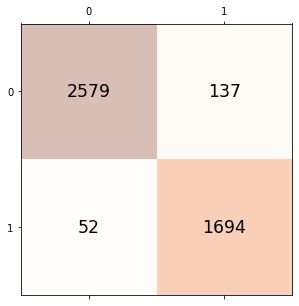

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred = grad_boost.predict(x_test)
conf_matrix_grad = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix_grad, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix_grad.shape[0]):
    for j in range(conf_matrix_grad.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_grad[i, j], va='center', ha='center', size='xx-large')

In [ ]:
import pickle
filename = 'heading_det_model_gradboost1.sav'
pickle.dump(grad_boost, open(filename, 'wb'))